<a href="https://colab.research.google.com/github/pavan-30/DBMS-Project/blob/main/Titanic_DBMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objectives of the Project:**
1. **Database Setup**: Establish a relational database (e.g., SQLite) and import the Titanic dataset.
2. **SQL Querying**: Write queries to extract insights on demographics, survival rates, and other metrics.
3. **Data Analysis**: Analyze patterns and relationships within the dataset using SQL queries.
4. **Visualization and Reporting**: Create visualizations and summarize findings for effective communication.

In [ ]:
# Import necessary libraries
import sqlite3
import pandas as pd

# Connect to the SQLite database (replace 'path_to_db' with the path to your SQLite database file)
conn = sqlite3.connect('path_to_db')

# Load the Titanic dataset into a Pandas DataFrame
titanic_df = pd.read_csv('titanic.csv')

# Write the DataFrame to a SQLite table
titanic_df.to_sql('titanic', conn, index=False, if_exists='replace')

891

1. **Connect to the SQLite database**:
   - `sqlite3.connect('path_to_db')`: Establishes a connection to a SQLite database file specified by `'path_to_db'`.

2. **Load the Titanic dataset into a Pandas DataFrame**:
   - `pd.read_csv('path_to_titanic_csv')`: Reads the Titanic dataset from a CSV file specified by `'path_to_titanic_csv'` and loads it into a Pandas DataFrame (`titanic_df`).

3. **Write the DataFrame to a SQLite table**:
   - `titanic_df.to_sql('titanic', conn, index=False, if_exists='replace')`: Writes the contents of the DataFrame to a SQLite table named `'titanic'` in the database connected by `conn`. It replaces the table if it already exists and does not include the DataFrame index in the table.

**1. Could you provide a glimpse into the structure and content of the Titanic dataset by showing the first five rows?**

In [ ]:
# Execute SQL queries
# Selecting the first few rows of the table
query = "SELECT * FROM titanic LIMIT 5"
result_df = pd.read_sql_query(query, conn)
print("First few rows of the Titanic dataset:")
print(result_df)

First few rows of the Titanic dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500  None        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250  None        S  
3      0            113803  53.1000  C123        S  
4      0        

Selecting the first few rows of the table:



* This query retrieves the first five rows of the Titanic dataset, providing a glimpse into the structure and content of the data.
* It helps to quickly understand the format of the dataset, column names, and some sample records.

**2. What is the average age of passengers aboard the Titanic, and what does it reveal about the typical age profile of passengers?**

In [ ]:
# Calculating the average age of passengers
query = "SELECT AVG(Age) AS average_age FROM titanic"
result_df = pd.read_sql_query(query, conn)
print("\nAverage age of passengers:")
print(result_df)


Average age of passengers:
   average_age
0    29.699118


Calculating the average age of passengers:


* Finding the average age of passengers gives an overall understanding of the age distribution among passengers.
* It provides insight into the typical age profile of Titanic passengers.

**3. How are the passengers distributed across the different ticket classes (1st, 2nd, and 3rd class), providing insights into the socioeconomic composition of Titanic passengers?**

In [ ]:
# Counting the number of passengers in each passenger class
query = "SELECT Pclass, COUNT(*) AS passenger_count FROM titanic GROUP BY Pclass"
result_df = pd.read_sql_query(query, conn)
print("\nPassenger count in each passenger class:")
print(result_df)


Passenger count in each passenger class:
   Pclass  passenger_count
0       1              216
1       2              184
2       3              491


Counting the number of passengers in each passenger class:


* This query helps understand the distribution of passengers across different ticket classes (1st, 2nd, and 3rd class).
* It provides insight into the socioeconomic composition of passengers aboard the Titanic.

**4. Can you provide the gender distribution among Titanic passengers, and how might this have influenced survival rates?**


Number of male and female passengers:
      Sex  count
0  female    314
1    male    577


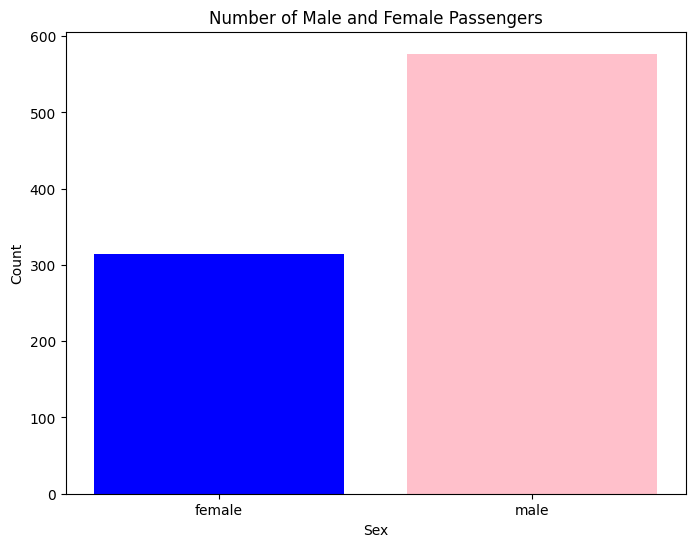

In [ ]:
# Counting the number of male and female passengers
query = "SELECT Sex, COUNT(*) AS count FROM titanic GROUP BY Sex"
result_df = pd.read_sql_query(query, conn)
print("\nNumber of male and female passengers:")
print(result_df)

# Visualization: Bar chart of male and female passengers
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(result_df['Sex'], result_df['count'], color=['blue', 'pink'])
plt.title('Number of Male and Female Passengers')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()



* This query provides insight into the gender distribution among passengers.

* Understanding the gender distribution is important as it can be a factor in survival rates or ticket class allocation.



**5. What does the maximum fare paid reveal about the economic diversity among passengers, and how might it correlate with survival chances?**

In [ ]:
# Finding the maximum fare paid by any passenger
query = "SELECT MAX(Fare) AS max_fare FROM titanic"
result_df = pd.read_sql_query(query, conn)
print("\nMaximum fare paid by any passenger:")
print(result_df)


Maximum fare paid by any passenger:
   max_fare
0  512.3292


* Knowing the maximum fare paid gives an idea of the range of ticket prices and helps identify outliers.
* It can also provide insight into the wealth distribution among passengers.

**6. How does knowing the minimum age of survivors contribute to understanding the vulnerability of different age groups during the Titanic disaster?**

In [ ]:
# Finding the minimum age of passengers who survived
query = "SELECT MIN(Age) AS min_age_survived FROM titanic WHERE Survived = 1"
result_df = pd.read_sql_query(query, conn)
print("\nMinimum age of passengers who survived:")
print(result_df)


Minimum age of passengers who survived:
   min_age_survived
0              0.42


* Finding the minimum age of survivors gives an idea of the youngest survivors.
* This information can be important for understanding the vulnerability of different age groups during the disaster.

**7. What insights can we gain from the total number of siblings/spouses and parents/children aboard regarding family dynamics and support networks during the disaster?**

In [ ]:
# Counting the number of siblings/spouses (SibSp) and parents/children (Parch) aboard
query = "SELECT SUM(SibSp) AS total_siblings_spouses, SUM(Parch) AS total_parents_children FROM titanic"
result_df = pd.read_sql_query(query, conn)
print("\nTotal number of siblings/spouses and parents/children aboard:")
print(result_df)


Total number of siblings/spouses and parents/children aboard:
   total_siblings_spouses  total_parents_children
0                     466                     340


* Counting the total number of siblings/spouses and parents/children aboard helps understand the family dynamics among passengers.
* It can provide insight into the support network available to passengers during the disaster.

**8. How does the average fare vary across different passenger classes, and what implications might this have on socioeconomic disparities among passengers?**


Average fare paid by passengers in each passenger class:
   Pclass   avg_fare
0       1  84.154687
1       2  20.662183
2       3  13.675550


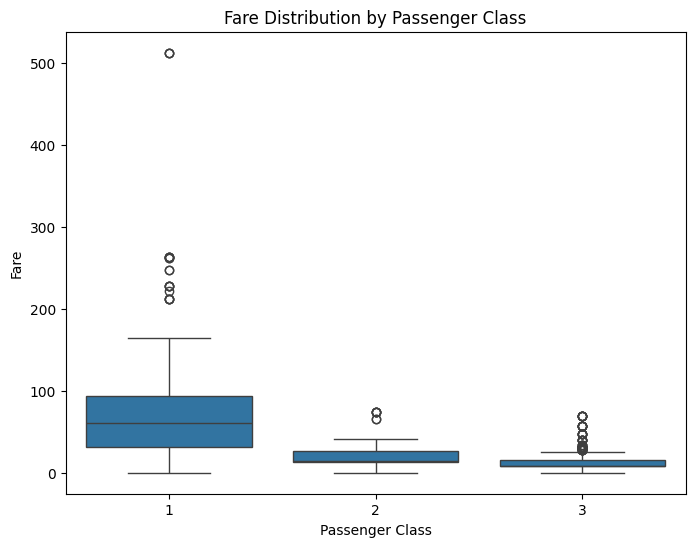

In [ ]:
# Finding the average fare paid by passengers in each passenger class
query = "SELECT Pclass, AVG(Fare) AS avg_fare FROM titanic GROUP BY Pclass"
result_df = pd.read_sql_query(query, conn)
print("\nAverage fare paid by passengers in each passenger class:")
print(result_df)

# Visualization: Box plot of fare distribution by passenger class
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(data=titanic_df, x='Pclass', y='Fare')
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

* Calculating the average fare by passenger class helps understand the fare distribution across different ticket classes.
* It provides insight into the socioeconomic status of passengers in each class.

**9. What can we infer from the number of passengers embarked from each port about the popularity of embarkation points and the demographics of passengers from different regions?**


Number of passengers embarked from each port:
  Embarked  count
0     None      2
1        C    168
2        Q     77
3        S    644


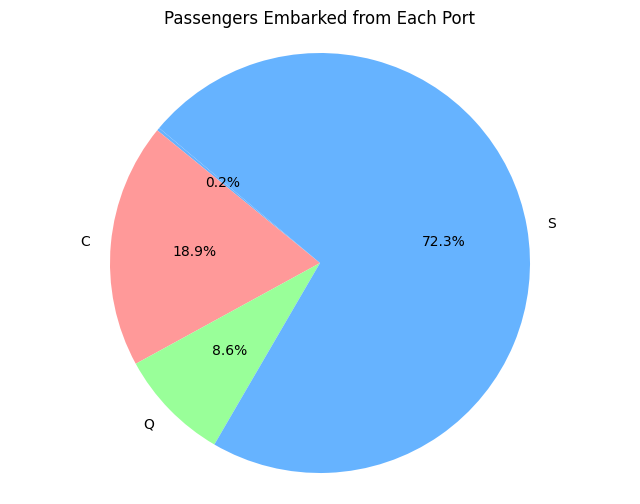

In [ ]:
# Counting the number of passengers who embarked from each port (C = Cherbourg, Q = Queenstown, S = Southampton)
query = "SELECT Embarked, COUNT(*) AS count FROM titanic GROUP BY Embarked"
result_df = pd.read_sql_query(query, conn)
print("\nNumber of passengers embarked from each port:")
print(result_df)

# Visualization: Pie chart of passengers embarked from each port with custom colors
colors = [ '#66b3ff', '#ff9999', '#99ff99']
plt.figure(figsize=(8, 6))
plt.pie(result_df['count'], labels=result_df['Embarked'], colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Passengers Embarked from Each Port')
plt.axis('equal')
plt.show()


* Knowing the number of passengers embarked from each port gives an idea of the embarkation points' popularity.
* It can provide insight into the geographic distribution of passengers.

**10. How does the survival rate differ across passenger classes, and what factors might have contributed to the disparities in survival chances?**


Survival rate by passenger class:
   Pclass  survival_rate
0       1       0.629630
1       2       0.472826
2       3       0.242363


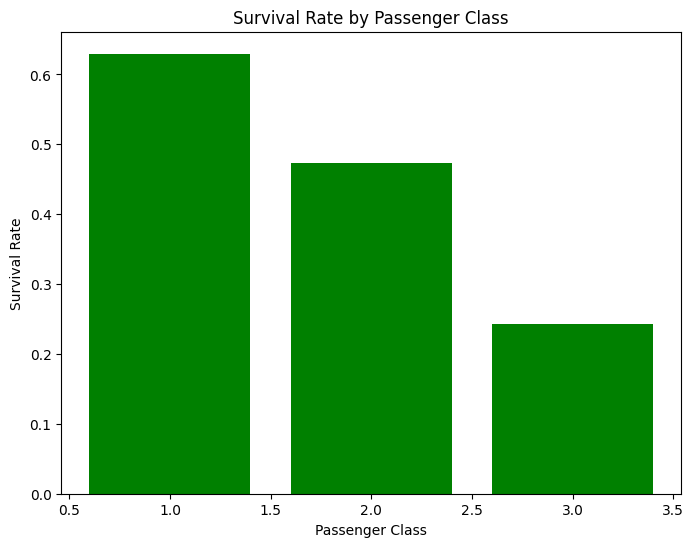

In [ ]:
# Finding the survival rate by passenger class
query = "SELECT Pclass, AVG(Survived) AS survival_rate FROM titanic GROUP BY Pclass"
result_df = pd.read_sql_query(query, conn)
print("\nSurvival rate by passenger class:")
print(result_df)

# Visualization: Bar chart of survival rate by passenger class
plt.figure(figsize=(8, 6))
plt.bar(result_df['Pclass'], result_df['survival_rate'], color='green')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

* Calculating the survival rate by passenger class helps understand the relationship between ticket class and survival probability.
* It provides insight into whether passengers in higher classes had better chances of survival.

**11. What insights can we derive from comparing the average ages of survivors and non-survivors regarding age-related patterns in survival rates?**


Average age of passengers who survived vs. who did not survive:
   Survived    avg_age
0         0  30.626179
1         1  28.343690


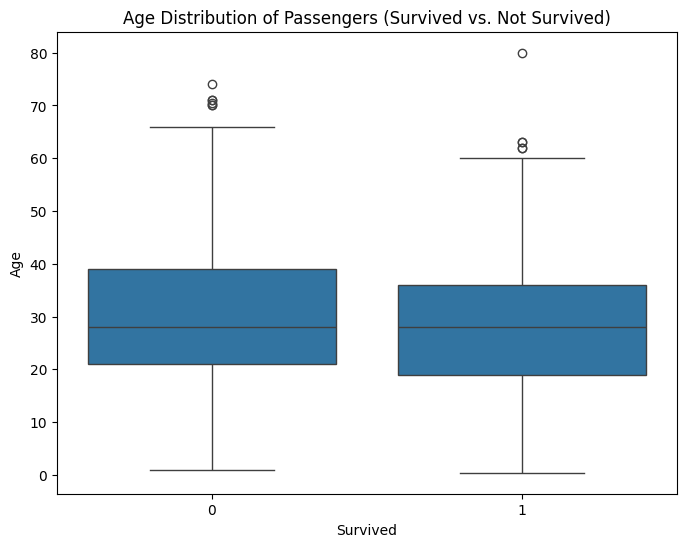

In [ ]:
# Finding the average age of passengers who survived vs. who did not survive
query = "SELECT Survived, AVG(Age) AS avg_age FROM titanic GROUP BY Survived"
result_df = pd.read_sql_query(query, conn)
print("\nAverage age of passengers who survived vs. who did not survive:")
print(result_df)

# Visualization: Box plot of age distribution for survivors vs. non-survivors
plt.figure(figsize=(8, 6))
sns.boxplot(data=titanic_df, x='Survived', y='Age')
plt.title('Age Distribution of Passengers (Survived vs. Not Survived)')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

* Comparing the average age of survivors and non-survivors helps identify any age-related patterns in survival rates.
* It can provide insight into whether certain age groups were more likely to survive.

**12. How might the presence of missing age information impact our analysis and conclusions drawn from the dataset?**

In [ ]:
# Finding the number of passengers with missing age information
query = "SELECT COUNT(*) AS count_missing_age FROM titanic WHERE Age IS NULL"
result_df = pd.read_sql_query(query, conn)
print("\nNumber of passengers with missing age information:")
print(result_df)


Number of passengers with missing age information:
   count_missing_age
0                177


* Counting the number of passengers with missing age information helps identify the extent of missing data in the age variable.
* It's important for understanding the completeness of the dataset and may influence analysis decisions.

**13. What can we learn from the proportion of passengers who traveled alone about the social dynamics and individual experiences during the Titanic voyage?**

In [ ]:
# Finding the number of passengers who traveled alone (without siblings/spouses or parents/children)
query = "SELECT COUNT(*) AS count_alone FROM titanic WHERE SibSp = 0 AND Parch = 0"
result_df = pd.read_sql_query(query, conn)
print("\nNumber of passengers who traveled alone:")
print(result_df)


Number of passengers who traveled alone:
   count_alone
0          537


* Counting the number of passengers who traveled alone (without siblings/spouses or parents/children) helps understand the proportion of solo travelers.
* It provides insight into the social connections and support networks available to passengers during the voyage.

**14. What does the histogram of passenger age distribution reveal about the age composition of Titanic passengers?**

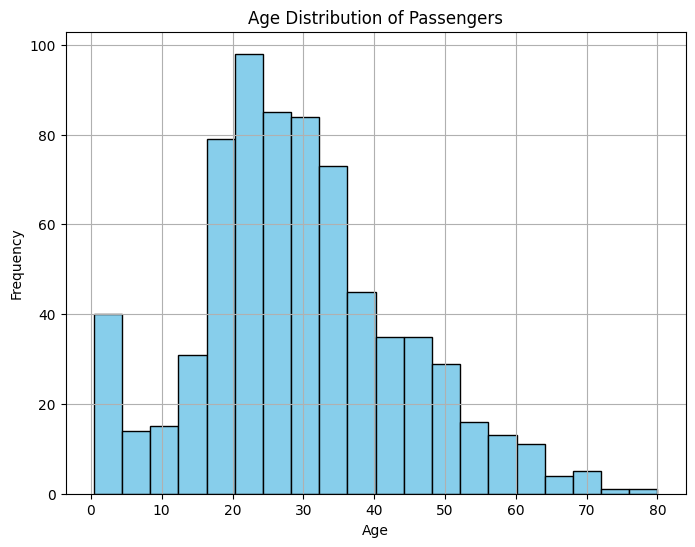

In [ ]:
# Finding the age distribution of passengers
query = "SELECT Age FROM titanic WHERE Age NOT NULL"
result_df = pd.read_sql_query(query, conn)

# Visualization: Histogram of passenger age distribution
plt.figure(figsize=(8, 6))
plt.hist(result_df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



* The histogram illustrates the spread of passenger ages, offering a visual representation of age diversity among Titanic passengers.
* Analyzing the distribution aids in identifying prevalent age groups and potential age-related patterns in the dataset.

